### Import Libraries

In [1]:
import logging
import os
import warnings
##for database connection
import cx_Oracle
import ads
from ads.database import connection 
from ads.database.connection import Connector
from ads.dataset.factory import DatasetFactory
from urllib.request import urlopen
from sqlalchemy import create_engine
##for data exploration
import pandas as pd
## for geospatial
import geopy

##warnings.filterwarnings("ignore", category=DeprecationWarning) 
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.INFO)
warnings.filterwarnings("ignore")

In [2]:
database_name = "ADB01"
#connection.get_repository(key=database_name)

In [3]:
wallet_path = os.path.join(os.path.expanduser("~"), f"Wallet_{database_name}.zip")

if database_name != "<database_name>":
    connection.import_wallet(wallet_path=wallet_path, key=database_name)

In [4]:
connector = Connector(key=database_name)

In [5]:
 #print(connector.config)

In [6]:
connector.connect()

### Connect to Autonomous Database

In [7]:
# Query data
# remove planes_new to planes
PLANES = """
    SELECT
        EPOCH_TIME,
        ICAO24,
        CALLSIGN,
        ORIGIN_COUNTRY,
        TIME_POSITION,
        LAST_CONTACT,
        LONGITUDE,
        LATITUDE,
        BARO_ALTITUDE,
        ON_GROUND,
        VELOCITY,
        TRUE_TRACK,
        VERTICAL_RATE,
        SENSORS,
        GEO_ALTITUDE,
        SQUAWK,
        SPI,
        POSITION_SOURCE,
        STUDIO_ID
    FROM 
        ANALYST.PLANES
    WHERE
        ORIGIN_COUNTRY = 'United States' 
    FETCH FIRST 200000 rows ONLY
    """

### Fetch Data 

In [8]:
#x = DatasetFactory.open(connector.uri, format="sql",table=PLANES_NEW)
#type(x)  

In [9]:
# Make a connection to the Engine and run a query
engine = create_engine(connector.uri)
sql_ais = PLANES
x = pd.read_sql(sql_ais, con=engine)
print(type(x))
print(len(x))

<class 'pandas.core.frame.DataFrame'>
200000


In [10]:
x.head()

,epoch_time,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source,studio_id
0,2022-02-02 14:37:00,a360ea,ATN9709,United States,2022-02-02 14:31:39,2022-02-02 14:31:54,-82.5409,28.0071,30.48,false,67.94,181.74,-3.25,None,76.20,2370,false,0,59589
1,2022-02-02 14:37:00,a8db55,N67WB,United States,2022-02-02 14:37:00,2022-02-02 14:37:00,-93.6222,43.0675,13106.40,false,232.90,262.64,0.33,None,12893.04,1536,false,0,59590
2,2022-02-02 14:37:00,ae68b1,RCH1044,United States,2022-02-02 14:34:54,2022-02-02 14:34:58,-25.9833,64.5229,7917.18,false,144.38,281.51,0.00,None,7322.82,3006,false,0,59591
3,2022-02-02 14:37:00,a997e5,None,United States,2022-02-02 14:36:48,2022-02-02 14:36:48,-77.0381,38.8424,NaN,true,0.00,151.88,NaN,None,NaN,None,false,0,59594
4,2022-02-02 14:37:00,a4fbc8,N420BR,United States,2022-02-02 14:36:59,2022-02-02 14:37:00,-78.0701,38.8211,5775.96,false,132.61,287.38,2.60,None,5890.26,5674,false,0,59597


In [11]:
x.to_csv('data.csv',index=False)

In [12]:
del x

In [16]:
df = pd.read_csv('data.csv')
df.head()

,epoch_time,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source,studio_id
0,2022-02-02 14:37:00,a360ea,ATN9709,United States,2022-02-02 14:31:39,2022-02-02 14:31:54,-82.5409,28.0071,30.48,False,67.94,181.74,-3.25,NaN,76.20,2370.0,False,0,59589
1,2022-02-02 14:37:00,a8db55,N67WB,United States,2022-02-02 14:37:00,2022-02-02 14:37:00,-93.6222,43.0675,13106.40,False,232.90,262.64,0.33,NaN,12893.04,1536.0,False,0,59590
2,2022-02-02 14:37:00,ae68b1,RCH1044,United States,2022-02-02 14:34:54,2022-02-02 14:34:58,-25.9833,64.5229,7917.18,False,144.38,281.51,0.00,NaN,7322.82,3006.0,False,0,59591
3,2022-02-02 14:37:00,a997e5,NaN,United States,2022-02-02 14:36:48,2022-02-02 14:36:48,-77.0381,38.8424,NaN,True,0.00,151.88,NaN,NaN,NaN,NaN,False,0,59594
4,2022-02-02 14:37:00,a4fbc8,N420BR,United States,2022-02-02 14:36:59,2022-02-02 14:37:00,-78.0701,38.8211,5775.96,False,132.61,287.38,2.60,NaN,5890.26,5674.0,False,0,59597


In [32]:
#Functions
def plot_scatter(df, metric_col, x='longitude', y='latitude', marker='.', alpha=1, figsize=(16,12), colormap='viridis'):    
    df.plot.scatter(x=x, y=y, c=metric_col, title=metric_col
                    , edgecolors='none', colormap=colormap, marker=marker, alpha=alpha, figsize=figsize);
    plt.xticks([], []); plt.yticks([], [])

def aperture_downsampling(df, hex_col, metric_col, coarse_aperture_size):
    df_coarse = df.copy()
    coarse_hex_col = 'hex{}'.format(coarse_aperture_size)
    df_coarse[coarse_hex_col] = df_coarse[hex_col].apply(lambda x: h3.h3_to_parent(x,coarse_aperture_size))
    dfc = df_coarse.groupby([coarse_hex_col])[[metric_col,]].mean().reset_index()
    dfc['latitude'] = dfc[coarse_hex_col].apply(lambda x: h3.h3_to_geo(x)[0])
    dfc['longitude'] = dfc[coarse_hex_col].apply(lambda x: h3.h3_to_geo(x)[1]) 
    return dfc

def kring_smoothing(df, hex_col, metric_col, k):
    dfk = df[[hex_col]] 
    dfk.index = dfk[hex_col]
    dfs =  (dfk[hex_col]
                 .apply(lambda x: pd.Series(list(h3.k_ring(x,k)))).stack()
                 .to_frame('hexk').reset_index(1, drop=True).reset_index()
                 .merge(df[[hex_col,metric_col]]).fillna(0)
                 .groupby(['hexk'])[[metric_col]].sum().divide((1 + 3 * k * (k + 1)))
                 .reset_index()
                 .rename(index=str, columns={"hexk": hex_col}))
    dfs['latitude'] = dfs[hex_col].apply(lambda x: h3.h3_to_geo(x)[0])
    dfs['longitude'] = dfs[hex_col].apply(lambda x: h3.h3_to_geo(x)[1]) 
    return dfs

def weighted_kring_smoothing(df, hex_col, metric_col, coef):
    # normalize the coef
    a = []
    for k, coe in enumerate(coef):
        if k == 0:
            a.append(coe)
        else:
            a.append(k * 6 * coe)
    coef = [c / sum(a) for c in coef]
    
    # weighted smoothing 
    df_agg = df[[hex_col]]
    df_agg['hexk'] = df_agg[hex_col]
    df_agg.set_index(hex_col,inplace=True)
    temp2 = [df_agg['hexk'].reset_index()]
    temp2[-1]['k'] = 0
    K=len(coef)-1 
    for k in range(1,K+1):
        temp2.append((df_agg['hexk']
                     .apply(lambda x: pd.Series(list(h3.hex_ring(x,k)))).stack()
                     .to_frame('hexk').reset_index(1, drop=True).reset_index()
                ))
        temp2[-1]['k'] = k
    df_all = pd.concat(temp2).merge(df)
    df_all[metric_col] = df_all[metric_col]*df_all.k.apply(lambda x:coef[x])
    dfs = df_all.groupby('hexk')[[metric_col]].sum().reset_index().rename(index=str, columns={"hexk": hex_col})
    dfs['latitude'] = dfs[hex_col].apply(lambda x: h3.h3_to_geo(x)[0])
    dfs['longitude'] = dfs[hex_col].apply(lambda x: h3.h3_to_geo(x)[1])
    return dfs

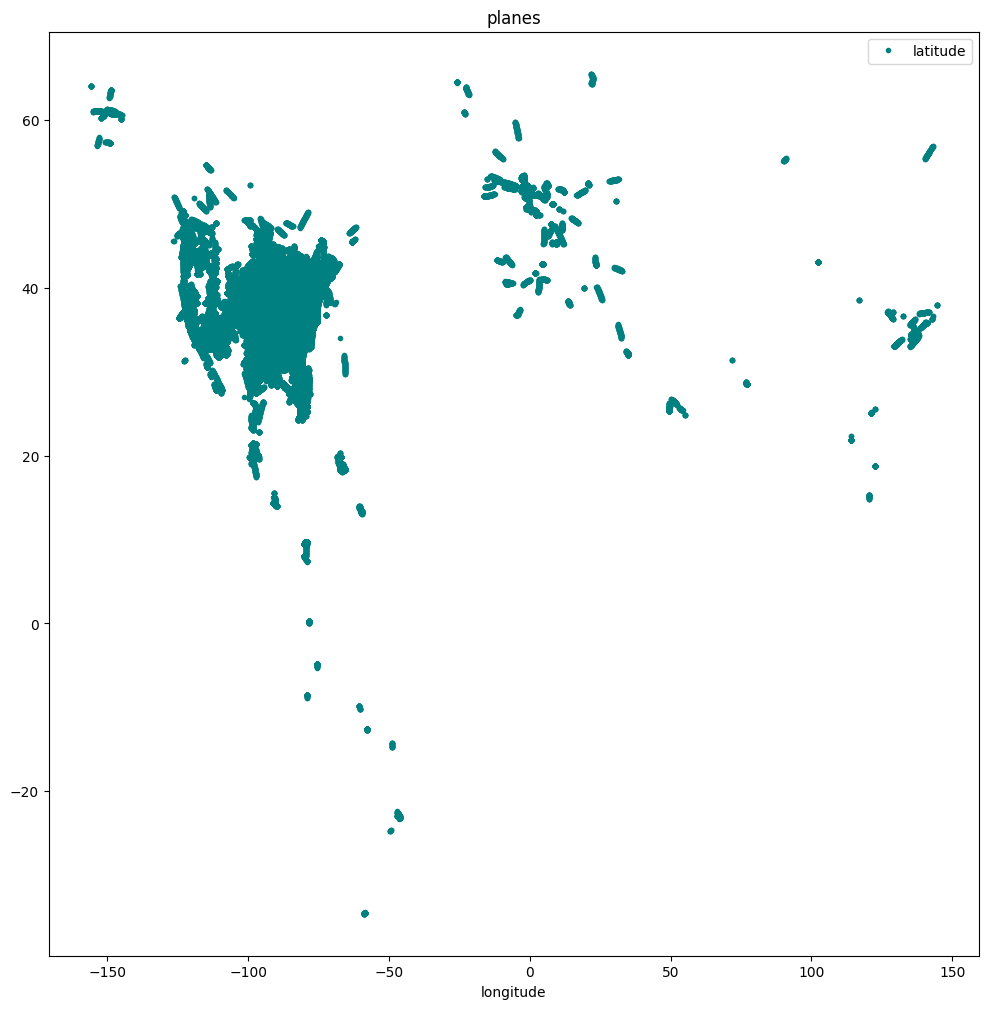

In [19]:
import matplotlib.pyplot as plt
df.plot(x='longitude',y='latitude',style='.',alpha=1,figsize=(12,12));
plt.title('planes');

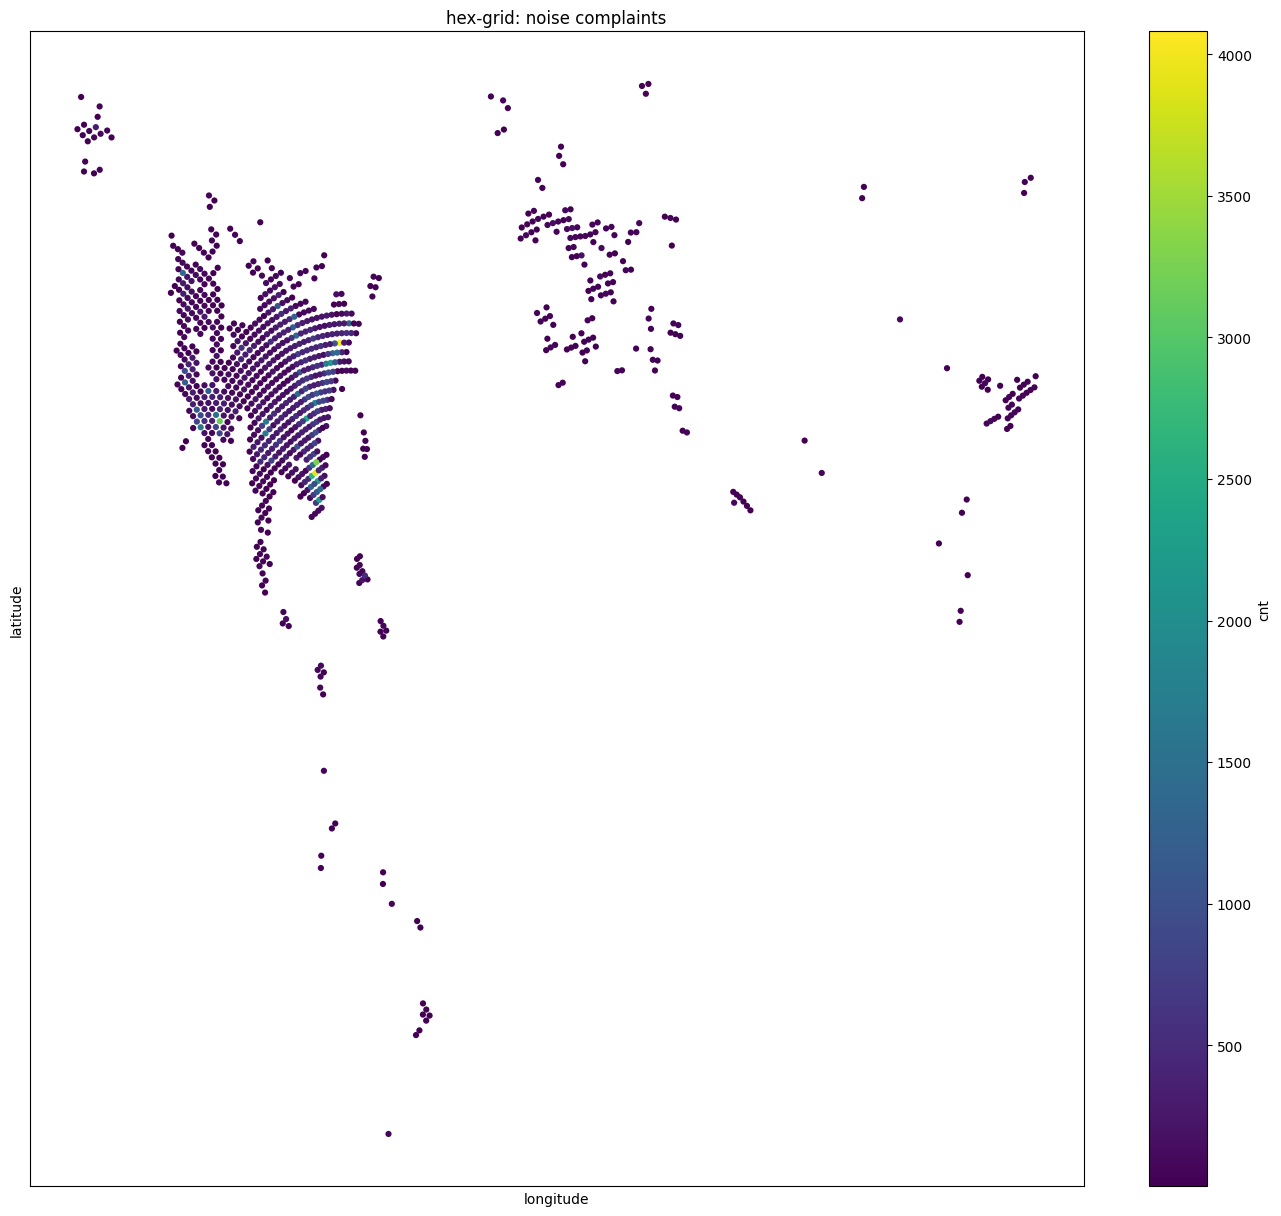

In [37]:
import h3
APERTURE_SIZE = 3
hex_col = 'hex'+str(APERTURE_SIZE)

# find hexs containing the points
df[hex_col] = df.apply(lambda x: h3.geo_to_h3(x.latitude,x.longitude,APERTURE_SIZE),1)

# aggregate the points
dfg = df.groupby(hex_col).size().to_frame('cnt').reset_index()

#find center of hex for visualization
dfg['latitude'] = dfg[hex_col].apply(lambda x: h3.h3_to_geo(x)[0])
dfg['longitude'] = dfg[hex_col].apply(lambda x: h3.h3_to_geo(x)[1])

# pltot the hexs
plot_scatter(dfg, metric_col='cnt', marker='o',figsize=(17,15))
plt.title('hex-grid: noise complaints');

In [25]:
#!pip install h3

sum sanity check: 1.0


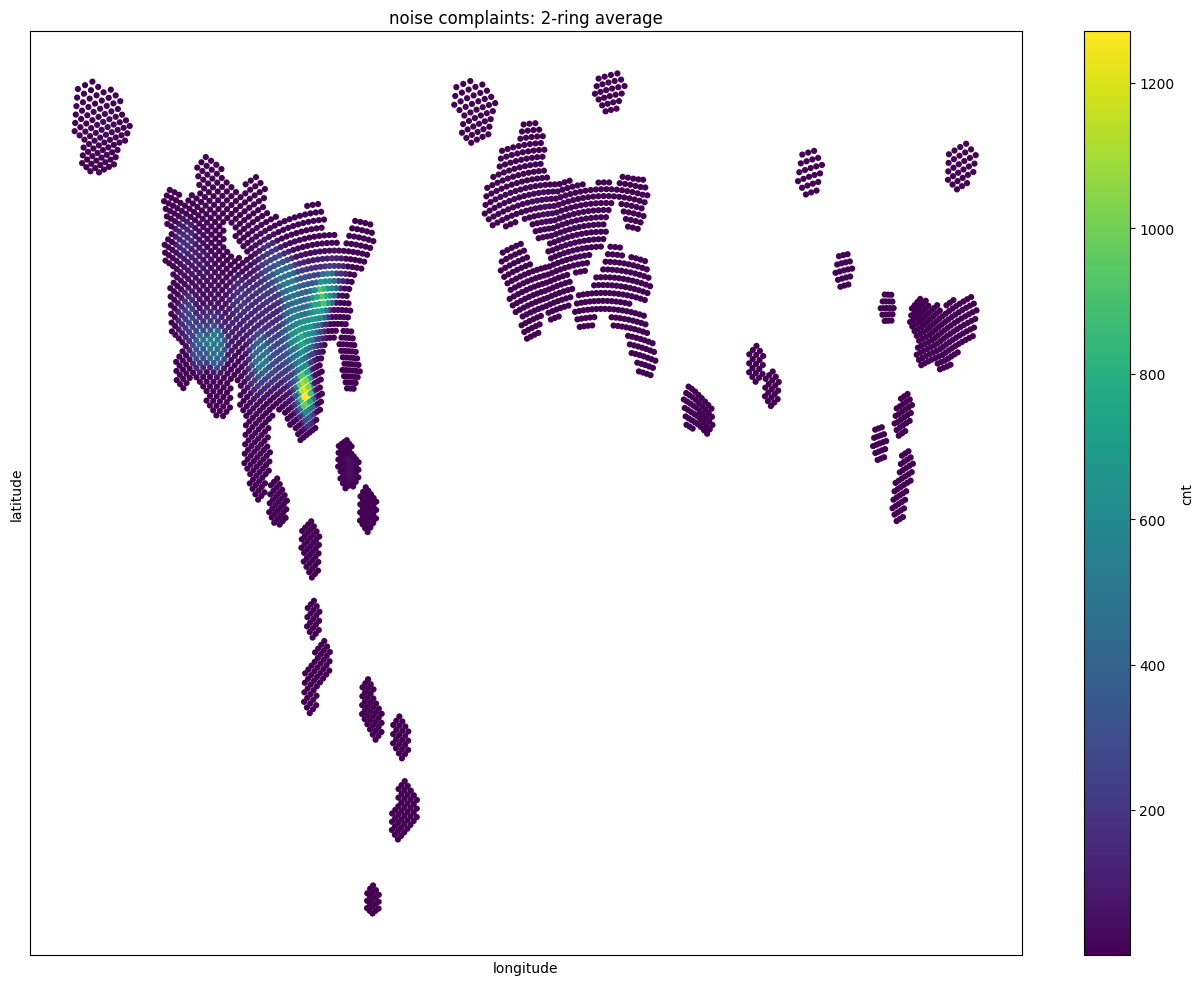

In [39]:
#kring_smoothing
k = 2
dfs= kring_smoothing(dfg, hex_col, metric_col='cnt', k=k)
print('sum sanity check:', dfs['cnt'].sum() / dfg['cnt'].sum())
plot_scatter(dfs, metric_col='cnt', marker='o')
plt.title('noise complaints: 2-ring average');

In [78]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(
    dfg, geometry=gpd.points_from_xy(dfg.longitude, dfg.latitude))

gdf = gdf.set_crs("EPSG:4326")

In [79]:
gdf.head()

,hex3,cnt,latitude,longitude,geometry
0,830749fffffffff,9,61.189819,-22.301802,POINT (-22.30180 61.18982)
1,83074efffffffff,21,63.233723,-21.062222,POINT (-21.06222 63.23372)
2,83075bfffffffff,24,64.341669,-26.371193,POINT (-26.37119 64.34167)
3,83075dfffffffff,44,63.964439,-22.553820,POINT (-22.55382 63.96444)
4,8308c6fffffffff,15,65.535668,22.931339,POINT (22.93134 65.53567)


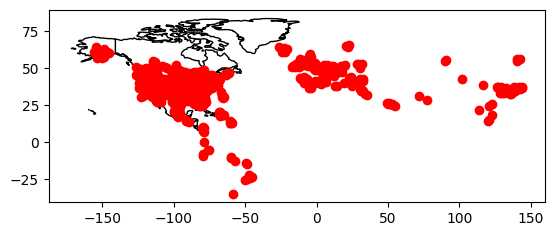

In [80]:
import matplotlib.pyplot as plt
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

plt.show()

In [81]:
gdf.dtypes

hex3           object
cnt             int64
latitude      float64
longitude     float64
geometry     geometry
dtype: object

In [83]:
import folium

m=folium.Map([37.0902,-95.7129],zoom_start=4,control_scale=True)

#for index, row in gdf.iterrows():
#    folium.Marker([gdf["latitude"],gdf["longitude"]], popup=gdf["cnt"]).add_to(map)
folium.GeoJson(gdf).add_to(m)
m

In [73]:
#!pip install folium geojson

### Plot to Map for vizualization

In [42]:
import folium
m=folium.Map([37.0902,-95.7129],zoom_start=4)

for index, row in x.iterrows():
    folium.Circle([row['latitude'], row['longitude']],
                        radius=4,
                        popup=row['icao24'],
                        fill=True,
                        color="#0c0d0d",
                       ).add_to(m)
m

ERROR:ADS Exception
Traceback (most recent call last):
  File "/home/datascience/conda/oracledatabaseforcpupython3_7v1/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-42-d9dcc2c99bf1>", line 4, in <module>
    for index, row in x.iterrows():
NameError: name 'x' is not defined
NameError: name 'x' is not defined

In [44]:
dfs.head()

,hex3,cnt,latitude,longitude
0,830629fffffffff,1.263158,66.109503,-27.671823
1,83062dfffffffff,1.263158,66.466173,-25.285604
2,830660fffffffff,1.842105,62.213351,-27.299668
3,830661fffffffff,0.578947,61.150150,-27.715136
4,830662fffffffff,1.263158,62.879576,-28.960166


##### Export map to html for offline viewing

In [18]:
m.save("map.html")

### Create Spatial Join

In [19]:
## import state geosjon
import geopandas as gpd
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"

In [20]:
gdf_state = gpd.read_file(state_geo)
gdf_state.head()

,id,name,geometry
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60..."
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798,..."
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109...."
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15..."
4,CA,California,"POLYGON ((-123.23326 42.00619, -122...."


In [63]:
#geoJSON_states = list(geoJSON_df.id.values)
#len(geoJSON_states)

In [21]:
gdfx = gpd.GeoDataFrame(
    x, geometry=gpd.points_from_xy(x.longitude, x.latitude))

In [65]:
## convert pandas dataframe to json
#df = pd.DataFrame(x, columns = ['icao24', 'longitude', 'latitude'])
#dfjson = df.to_json()

In [22]:
join = gpd.sjoin(gdfx, gdf_state, op='within')
join.head()

,epoch_time,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,...,sensors,geo_altitude,squawk,spi,position_source,studio_id,geometry,index_right,id,name
0,2022-02-02 14:37:00,a360ea,ATN9709,United States,2022-02-02 14:31:39,2022-02-02 14:31:54,-82.5409,28.0071,30.48,false,...,None,76.20,2370,false,0,59589,POINT (-82.54090 28.00710),8,FL,Florida
38,2022-02-02 14:37:18,a07d59,OTA1,United States,2022-02-02 14:37:17,2022-02-02 14:37:17,-80.5906,28.2731,8953.50,false,...,None,9235.44,2564,false,0,60830,POINT (-80.59060 28.27310),8,FL,Florida
45,2022-02-02 14:37:18,a793c9,N588BR,United States,2022-02-02 14:37:17,2022-02-02 14:37:17,-81.9331,28.6528,701.04,false,...,None,746.76,1200,false,0,60841,POINT (-81.93310 28.65280),8,FL,Florida
47,2022-02-02 14:37:18,aa37ce,AAL2817,United States,2022-02-02 14:37:09,2022-02-02 14:37:09,-80.5125,25.7013,1844.04,false,...,None,1927.86,None,false,0,60846,POINT (-80.51250 25.70130),8,FL,Florida
59,2022-02-02 14:37:18,ae5718,CNV4891,United States,2022-02-02 14:37:16,2022-02-02 14:37:16,-85.7250,30.7808,12192.00,false,...,None,12527.28,None,false,0,60871,POINT (-85.72500 30.78080),8,FL,Florida


In [23]:
grouped = join.groupby('name').size()
df = grouped.to_frame().reset_index()
df.rename(columns={"name": "name", 0: "count"}, inplace=True)
df.head()

,name,count
0,Alabama,3937
1,Alaska,553
2,Arizona,9895
3,Arkansas,2691
4,California,10533


In [24]:
merged = gdf_state.merge(df, on='name', how='outer')
merged.head()

,id,name,geometry,count
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60...",3937.0
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798,...",553.0
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109....",9895.0
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15...",2691.0
4,CA,California,"POLYGON ((-123.23326 42.00619, -122....",10533.0


In [25]:
# Initialize folium map.
cmap = folium.Map(location=[37.0902,-95.7129], zoom_start=4)

# Set up Choropleth map
folium.Choropleth(
    geo_data=merged,
    data=merged,
    columns=['name','count'],
    key_on="feature.properties.name",
    fill_color='YlOrRd',
    fill_opacity=1,
    line_opacity=0.2,
    legend_name="Events",
    smooth_factor=0,
    Highlight= True,
    line_color = "#0000",
    name = "Test",
    show=False,
    overlay=True,
    nan_fill_color = "White"
).add_to(cmap)
#cmap

In [26]:
cmap.save("cmap.html")